# Tricks of the trade TF/Keras [small dataset]

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras. It uses a small data set so that it can be trained on the CPU.

Below are several experiments.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

C:\Users\Daniel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras 2.1.5 TF 1.2.1 Python sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
(4000, 1, 28, 28) (4000,) 28


### Suggestions for the experiment

Let the experiments run for 100 epochs. You might need to restart the kernel so that namings of the layers are the same

* with init zero 
* with sigmoid activation 
* with ReLU activation
* with dropout (p=0.3)
* with batch-normalization and dropout

In [2]:
### First model with all zeros
name = 'sigmoid_init0'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784), init='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(50,init='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax',init='zero'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, batch_input_shape=(None, 784..., kernel_initializer="zero")`
  after removing the cwd from sys.path.
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="zero")`
  import sys
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="zero")`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
### Second model with default initialization
name = 'sigmoid'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Third model with relu activation
name = 'relu'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Fourth model with Dropout
name = 'dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Fifth model with Batch-Normalization and Dropout
name = 'batch_dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 418,060
Trainable params: 418,060
Non-trainable params: 0
_________________________________________________________________


### Untrained model


In [4]:
np.log(0.1)

-2.3025850929940455

In [5]:
model.evaluate(X[0:2000], convertToOneHot(y[0:2000],10))

2000/2000 [==============================] - 0s 217us/step


[2.302585361480713, 0.0955]

In [6]:
model.predict_classes(X[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
#model.save('/tmp/start.keras')
#%ls -hl /tmp/start.keras

## Training

In [8]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='tensorboard/mnist_small/' + name + '/', 
    write_graph=True,
    histogram_freq=1
)

history = model.fit(X[0:2400], 
              convertToOneHot(y[0:2400],10), 
              nb_epoch=100, 
              batch_size=128, 
              callbacks=[tensorboard],
              validation_data=[X[2400:3000], convertToOneHot(y[2400:3000],10)], verbose=2)


# Attention, if you run this in a docker container, setting verbose=1 sometimes kills the whole container 
# ERRO[0695] error getting events from daemon: EOF

# Sometimes also the TensorBoard callback kills the container

C:\Users\Daniel\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2400 samples, validate on 600 samples
Epoch 1/100
 - 0s - loss: 2.3035 - acc: 0.1017 - val_loss: 2.3003 - val_acc: 0.1067
Epoch 2/100
 - 0s - loss: 2.3035 - acc: 0.0992 - val_loss: 2.3001 - val_acc: 0.1233
Epoch 3/100
 - 0s - loss: 2.3024 - acc: 0.1142 - val_loss: 2.3015 - val_acc: 0.1067
Epoch 4/100
 - 0s - loss: 2.3027 - acc: 0.1096 - val_loss: 2.2993 - val_acc: 0.1067
Epoch 5/100
 - 0s - loss: 2.3027 - acc: 0.1142 - val_loss: 2.2997 - val_acc: 0.1067
Epoch 6/100
 - 0s - loss: 2.3019 - acc: 0.1079 - val_loss: 2.2988 - val_acc: 0.1067
Epoch 7/100
 - 0s - loss: 2.3015 - acc: 0.0946 - val_loss: 2.2985 - val_acc: 0.1067
Epoch 8/100
 - 0s - loss: 2.3012 - acc: 0.1125 - val_loss: 2.2995 - val_acc: 0.1067
Epoch 9/100
 - 0s - loss: 2.3011 - acc: 0.1054 - val_loss: 2.2984 - val_acc: 0.1067
Epoch 10/100
 - 0s - loss: 2.3001 - acc: 0.1071 - val_loss: 2.2982 - val_acc: 0.1067
Epoch 11/100
 - 0s - loss: 2.2987 - acc: 0.1092 - val_loss: 2.2967 - val_acc: 0.1233
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 1.5299 - acc: 0.4150 - val_loss: 1.6065 - val_acc: 0.3733
Epoch 98/100
 - 0s - loss: 1.5184 - acc: 0.4300 - val_loss: 1.5956 - val_acc: 0.3917
Epoch 99/100
 - 0s - loss: 1.5053 - acc: 0.4179 - val_loss: 1.5791 - val_acc: 0.3800
Epoch 100/100
 - 1s - loss: 1.4897 - acc: 0.4275 - val_loss: 1.5634 - val_acc: 0.3867


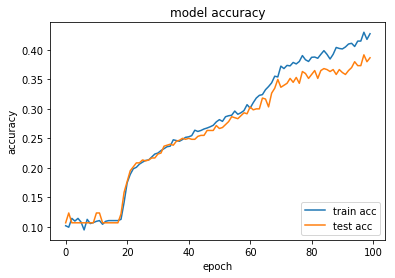

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc='lower right')
plt.show() 


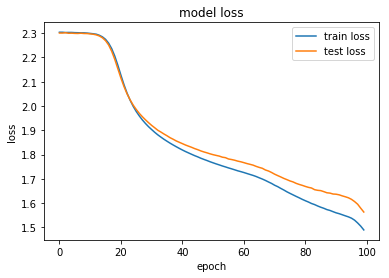

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

In [ ]:
!tensorboard --logdir=tensorboard/mnist_small/